In [1]:
import numpy as np
import pandas as pd

from gtda.time_series import SlidingWindow
from gtda.diagrams import PersistenceLandscape
from gtda.homology import VietorisRipsPersistence

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
# !pip install spectrum 
# from spectrum.periodogram import speriodogram

import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

from pylab import *

import matplotlib.gridspec as gridspec

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Functions to compute the Lp norms
# Find the range of x values from the persistence diagram:
def Ftseq(diagram):
    births =[]
    deaths =[]
    for pair in diagram:
        if pair[2] == 1:
            births.append(pair[0])
            deaths.append(pair[1])
    return np.linspace(min(births), max(deaths), 100)

# Calculate Lp norm:
def Lpnorm(tseq, landscapevalues, p = 1):
    norms = []
    if p == 'aucoriginal':
        layervalues = landscapevalues[layers]
        for point in zip(tseq,layervalues):
            norms.append(np.trapz(layervalues, tseq))
        return(sum(norms))
    elif p == 'aucUpdated':
        layervalues = landscapevalues[layers]
        return (np.trapz(layervalues))
    else:
        normvalues = []
        for layer in range(layers, 2*layers):
            layervalues = landscapevalues[layer]
            normvalue = np.linalg.norm(layervalues,p)**p
            if normvalue == 0:
                break
            else: 
                normvalues.append(normvalue)
        return (np.sum(normvalues)**(1/p))

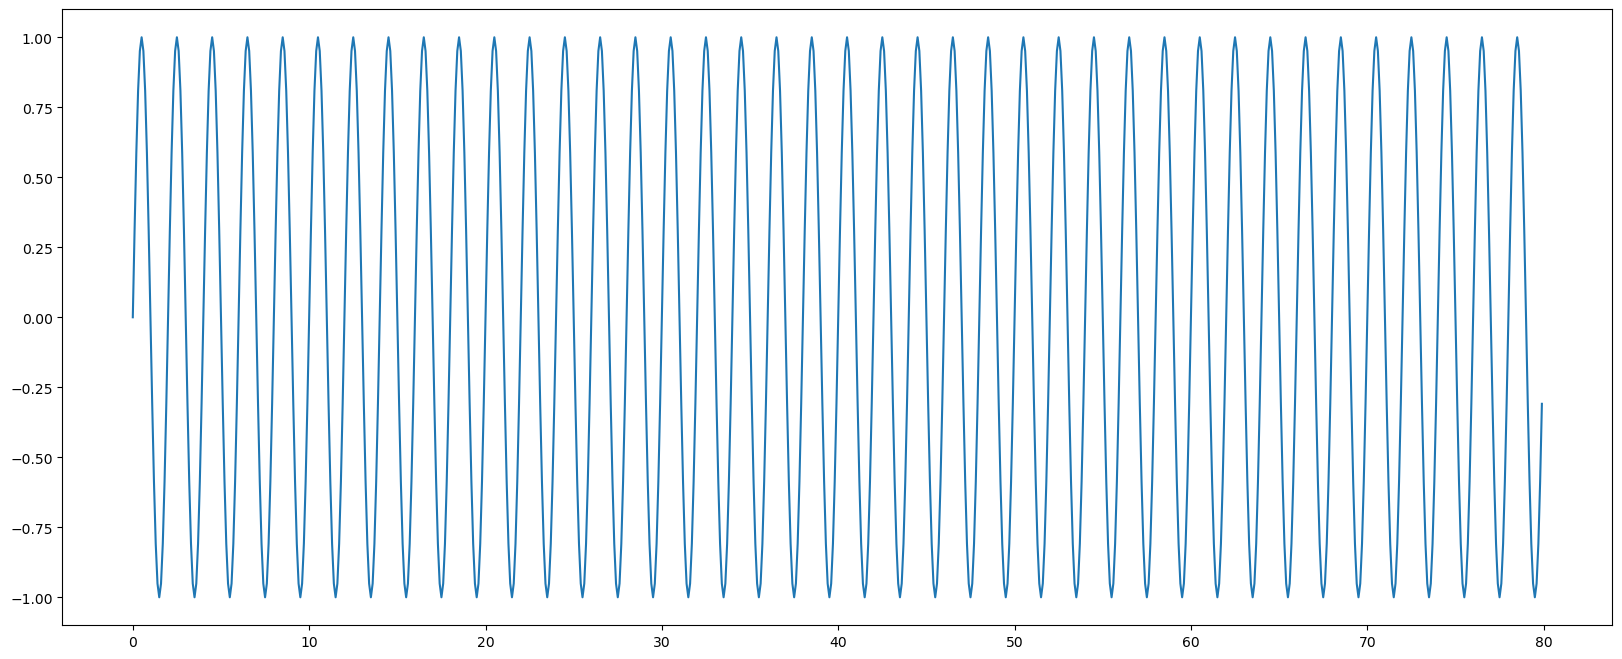

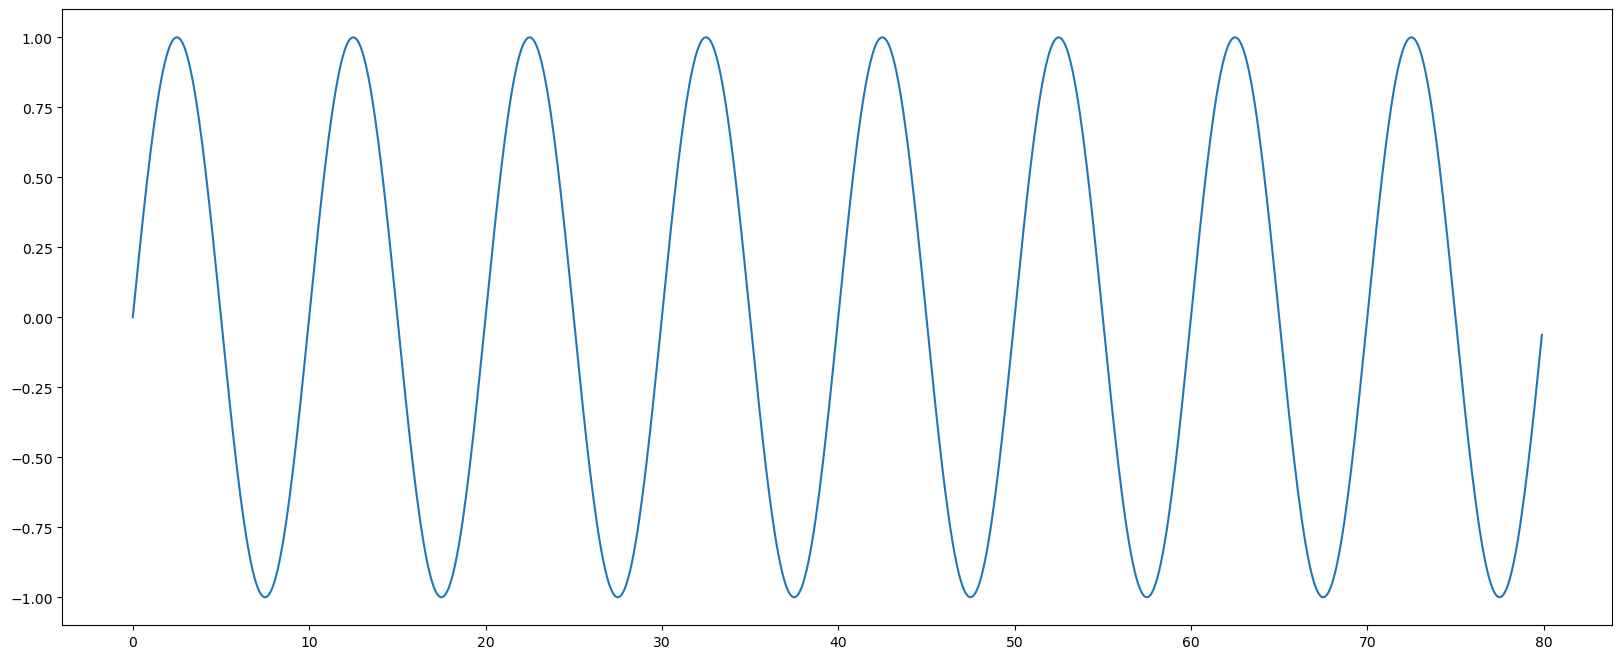

In [28]:
x = np.arange(0, 80, .1)
f1 =  math.pi * (1/1)
f2 =  math.pi * (1/5)

y1 = (np.sin(f1*x) 
#             + np.random.normal(scale=.1, size=len(x))

        )
y2 = (np.sin(f2*x) 
#             + np.random.normal(scale=.1, size=len(x))

        )
y1 = np.round(y1, 5)
y2 = np.round(y2, 5)
plt.figure(figsize = (20,8))
plt.plot(x,y1)
plt.show()
plt.figure(figsize = (20,8))
plt.plot(x,y2)

plt.show()
# print('period = ' + str(2*math.pi/f1))

In [35]:
for i1 in range(3,5):
    for i2 in range(3,5):
        print((i1,i2) if i1 != i2 else None)

None
(3, 4)
(4, 3)
None


In [15]:
simulated_data = pd.DataFrame({'Simulated Data 1' : y1,
                               'Simulated Data 2' : y2
             })
simulated_data

Simulated Data 1  Simulated Data 2
0             0.00000           0.00000
1             0.07846           0.06279
2             0.15643           0.12533
3             0.23345           0.18738
4             0.30902           0.24869
..                ...               ...
795          -0.38268          -0.30902
796          -0.30902          -0.24869
797          -0.23345          -0.18738
798          -0.15643          -0.12533
799          -0.07846          -0.06279

[800 rows x 2 columns]

In [131]:
d = {'i1': [],
     'i2' : [],
     'avgl1norm': []}

In [ ]:
d['i1'].append(i1)

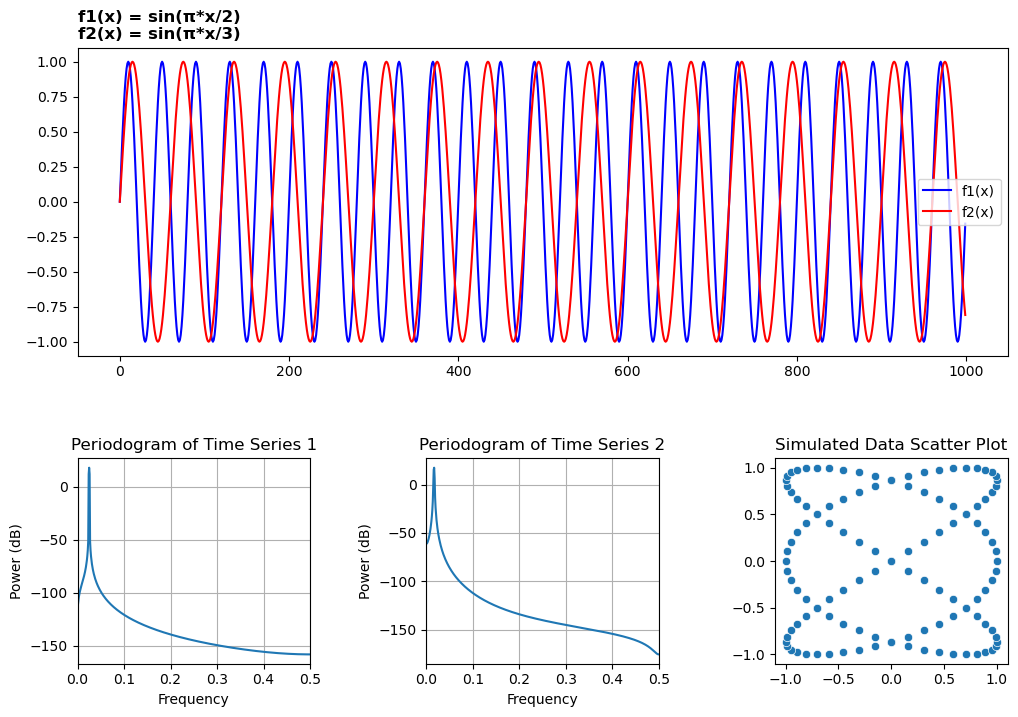

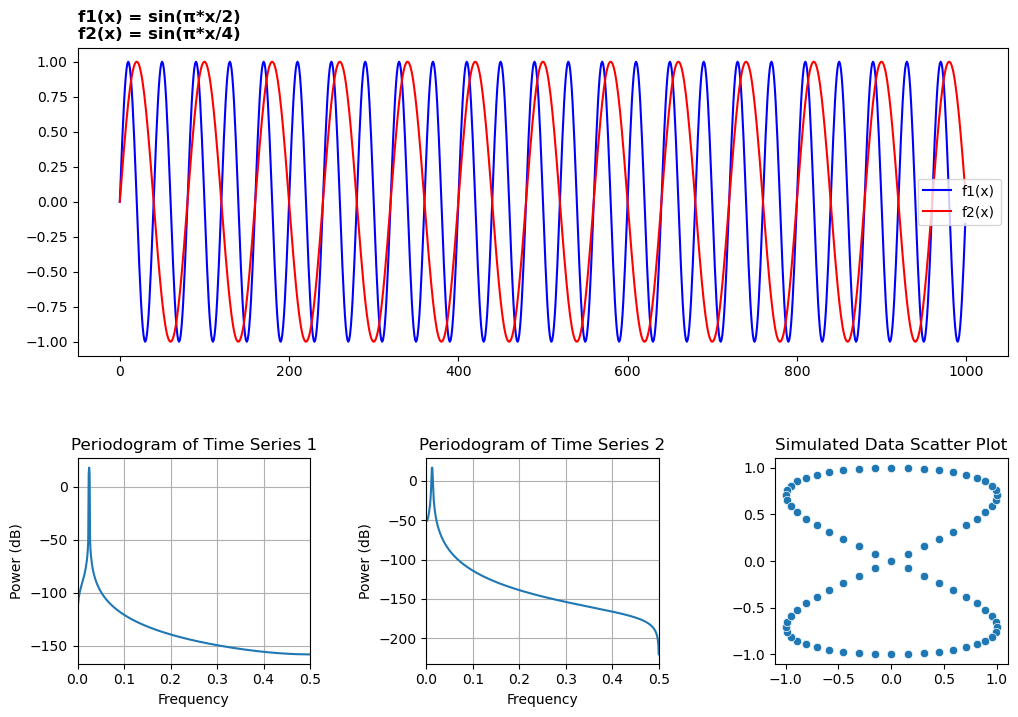

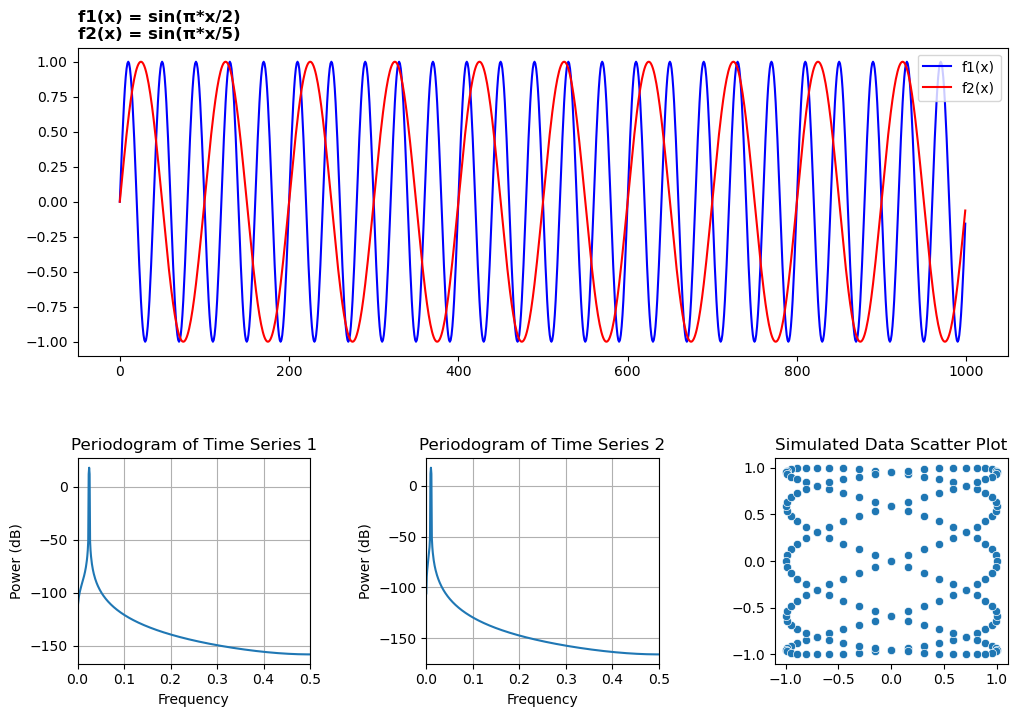

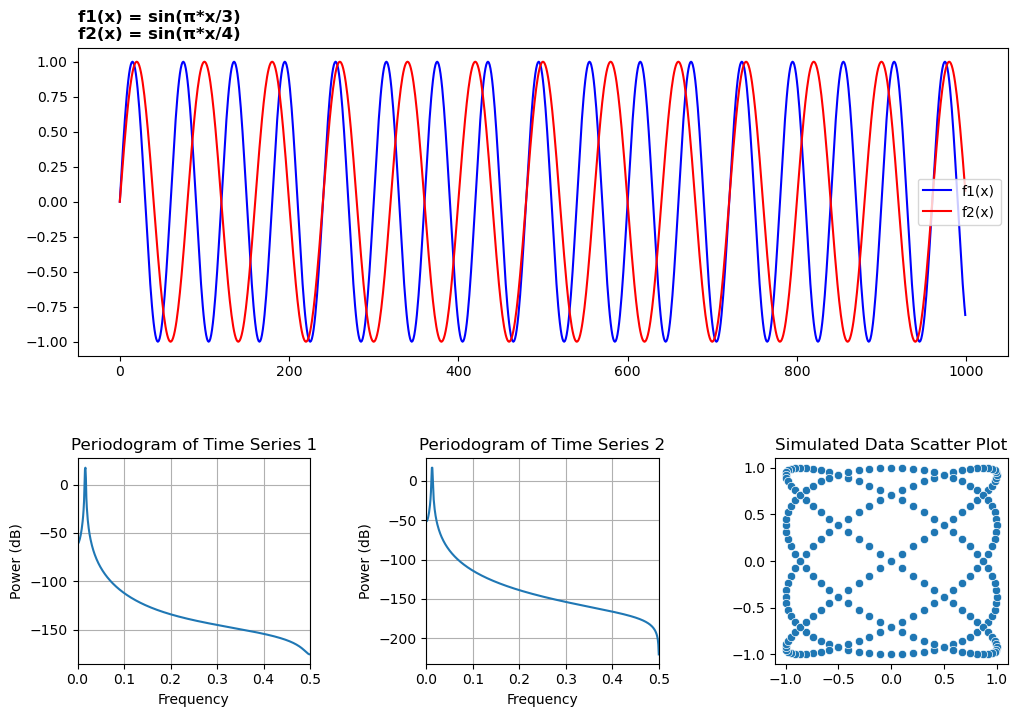

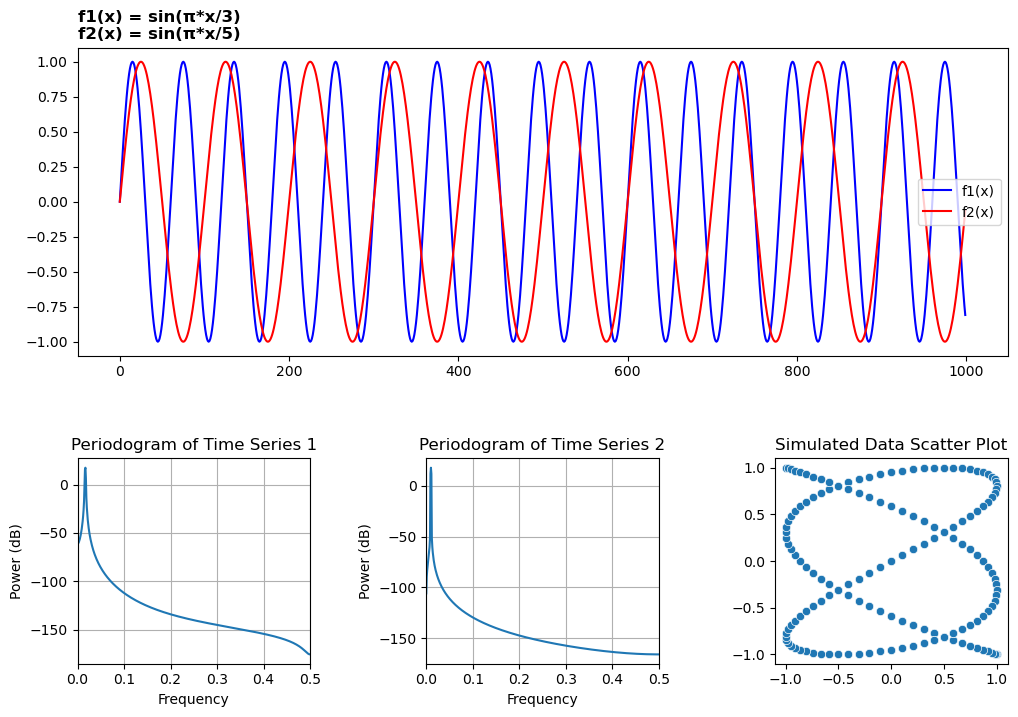

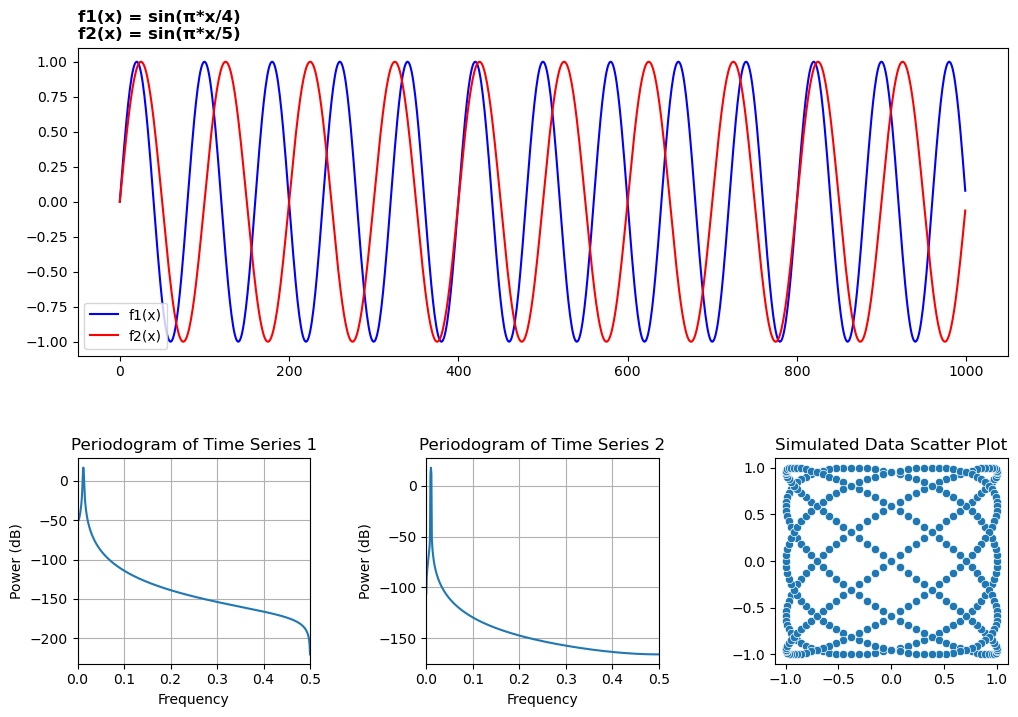

In [185]:
from spectrum import Periodogram


d = {'i1': [],
     'i2' : [],
     'avgl1norm': []}

avgl1normsnonoise = []
avgl2normsnonoise = []
x = np.arange(0, 100, .1)



from itertools import combinations


for iz in list(combinations(np.arange(2,6), 2)):
    i1 = iz[0]
    i2 = iz[1]

    f1 =  math.pi * (1/i1)
    f2 =  math.pi * (1/i2)
    y1 = (np.sin(f1*x))
    y2 = (np.sin(f2*x))
#     y1 = np.round(y1, 5)
#     y2 = np.round(y2, 5)




    p1 = Periodogram(y1)
    p1.run()

    p2 = Periodogram(y2)
    p2.run()

    simulated_data = pd.DataFrame({'Simulated Data 1' : y1,
                                   'Simulated Data 2' : y2
                 })

    simulated_data = simulated_data.dropna()

    # Create point cloud
    window_size = int(i1 * i2 * 2 * 10)
    stride = 1
    df = simulated_data
    X = df
    y = df.index
    SW = SlidingWindow(size=window_size, stride=stride)
    X_sw, yr = SW.fit_transform_resample(X, y)

    # Calculate the norms for each of the windows in the multivariate sliding window
#     variabilitys = np.empty(window_size)
#     variabilitys[:] = np.nan
#     variabilitys = list(variabilitys)

#     correlations = np.empty(window_size)
#     correlations[:] = np.nan
#     correlations = list(correlations)

#     Norms = np.empty(window_size)
#     Norms[:] = np.nan
#     Norms = list(Norms)

#     l2Norms = np.empty(window_size)
#     l2Norms[:] = np.nan
#     l2Norms = list(l2Norms)

    layers = 100
    vrp = VietorisRipsPersistence()
    pl = PersistenceLandscape(layers)
    
    pointcloud = X_sw[0]
    persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
    landscapedata = pl.fit_transform(persistencediagram)
    tseq = Ftseq(persistencediagram[0])
    Norm = Lpnorm(tseq, landscapedata[0], p = 1)
    l2Norms.append(Lpnorm(tseq, landscapedata[0], p = 2))



    Gtop = gridspec.GridSpec(2, 3, hspace = 0)
    Gbot = gridspec.GridSpec(2, 3, hspace = 1, wspace = .5)

    plt.figure(figsize=(12, 8))

    ax1 = plt.subplot(Gtop[0,:])
    ax1.plot(simulated_data['Simulated Data 1'], color = 'blue', label = 'f1(x)')
    ax1.plot(simulated_data['Simulated Data 2'], color = 'red', label = 'f2(x)')
    plt.title(f'f1(x) = sin(π*x/{i1}) \nf2(x) = sin(π*x/{i2})', loc='left', weight = 'bold')
    # plt.xlim([0,800])

    plt.legend()
#     ax2 = plt.subplot(Gtop[1,:], sharex = ax1)
#     ax2.plot(variabilitys, color = 'blueviolet', label = 'Variability')
#     #     corrlabel = 'Correlation' if maxcorr >= 0 else 'Correlation (Negative)'
#     corrlabel = 'Correlation'
#     ax2.plot(correlations, color = 'orange', label = corrlabel)
#     ax2.plot(Norms, color = 'black', label = 'L1 Norm')
#     #     ax2.plot(l2Norms, color = 'green', label = 'L2 Norm')
#     plt.ylim([-1.1,1.1])
#     plt.legend()
    

    plt.subplot(Gbot[1,0])
    p1.plot(sides='onesided')
    plt.title('Periodogram of Time Series 1')
    plt.subplot(Gbot[1, 1])
    p2.plot(sides='onesided')
    plt.title('Periodogram of Time Series 2')
    plt.subplot(Gbot[1, 2])
    sns.scatterplot(pointcloud[:,0], pointcloud[:,1])
    plt.title('Simulated Data Scatter Plot')

    #     plt.suptitle('Lag ' + str(lag), fontsize=10)
    #     plt.savefig('/Users/brianlivian/Desktop/Sine Lag Delays - No Noise' + ' ' +str(lag))
    plt.show()

#     print(Norm)
    
    d['i1'].append(i1)
    d['i2'].append(i2)
    d['avgl1norm'].append(Norm)
    fig = vrp.fit_transform_plot(pointcloud.reshape(1, *pointcloud.shape))


    fig = pl.plot(landscapedata, 
        homology_dimensions = [1], 
        plotly_params=None)
    fig.show()

    
    